In [1]:
import os
# os.chdir("../")
os.environ["CUDA_VISIBLE_DEVICES"] = "2"
import numpy as np
# import jax.numpy as jnp
import matplotlib.pyplot as plt

In [2]:
import torch
from gpytorch.kernels import RBFKernel, ScaleKernel, PeriodicKernel, MaternKernel, CosineKernel
from skgpytorch.models import SVGPRegressor, SGPRegressor

In [3]:
noise_variance=1e-6
np.random.seed(777)

X = np.random.uniform(-3., 3., (10, 1))
y = np.sin(X) + np.random.randn(10, 1) * noise_variance**0.5

np.random.seed(777)
Xtest = np.random.uniform(-3., 3., (100, 1))
ytest = np.sin(Xtest) + np.random.randn(100, 1) * noise_variance**0.5

Xtest.sort(axis=0)

X = torch.tensor(X)
y = torch.tensor(y).reshape(-1,)
Xtest = torch.tensor(Xtest)
ytest = torch.tensor(ytest).reshape(-1,)


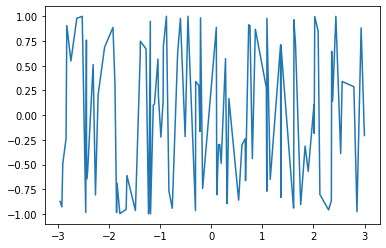

In [4]:
plt.plot(Xtest, ytest)

In [5]:
X.shape, y.shape

(torch.Size([10, 1]), torch.Size([10]))

In [6]:
# kernel1 = ScaleKernel(RBFKernel(ard_num_dims=1,active_dims=(9))) #nu=2.5,
  # kernel2 = ScaleKernel(RBFKernel(ard_num_dims=n, active_dims=(6)))
  # kernel3 = ScaleKernel(PeriodicKernel(ard_num_dims=n, active_dims=(6)))
kernel1 = ScaleKernel(RBFKernel()) 
kernel2 = ScaleKernel(PeriodicKernel())
# kernel5 = ScaleKernel(PeriodicKernel(ard_num_dims=1,active_dims=(9)))

kernel = kernel1 + kernel2  #+ kernel1*kernel5
# induce_points = 512
inducing_points =  X[np.arange(0,X.shape[0],2)] 
# inducing_points = x[torch.randperm(x.shape[0])[: 1500]]

model = SGPRegressor(X.to("cuda"), y.to("cuda"), kernel,
                       inducing_points).to("cuda")

In [7]:
loss = model.fit(lr=0.01, n_epochs=60,verbose=2,
          random_state=0, n_restarts=1)

tensor(1.4289, device='cuda:0', dtype=torch.float64, grad_fn=<NegBackward0>)
restart: 0, epoch: 1, iter: 1, loss: 1.4289
tensor(1.4061, device='cuda:0', dtype=torch.float64, grad_fn=<NegBackward0>)
restart: 0, epoch: 2, iter: 1, loss: 1.4061
tensor(1.3996, device='cuda:0', dtype=torch.float64, grad_fn=<NegBackward0>)
restart: 0, epoch: 3, iter: 1, loss: 1.3996
tensor(1.3931, device='cuda:0', dtype=torch.float64, grad_fn=<NegBackward0>)
restart: 0, epoch: 4, iter: 1, loss: 1.3931
tensor(1.3893, device='cuda:0', dtype=torch.float64, grad_fn=<NegBackward0>)
restart: 0, epoch: 5, iter: 1, loss: 1.3893
tensor(1.3849, device='cuda:0', dtype=torch.float64, grad_fn=<NegBackward0>)
restart: 0, epoch: 6, iter: 1, loss: 1.3849
tensor(1.3787, device='cuda:0', dtype=torch.float64, grad_fn=<NegBackward0>)
restart: 0, epoch: 7, iter: 1, loss: 1.3787
tensor(1.3713, device='cuda:0', dtype=torch.float64, grad_fn=<NegBackward0>)
restart: 0, epoch: 8, iter: 1, loss: 1.3713
tensor(1.3634, device='cuda:0', 

/home/desai.aadesh/miniconda3/envs/nlim/lib/python3.10/site-packages/gpytorch/kernels/inducing_point_kernel.py:61: UserWarning: torch.triangular_solve is deprecated in favor of torch.linalg.solve_triangularand will be removed in a future PyTorch release.
torch.linalg.solve_triangular has its arguments reversed and does not return a copy of one of the inputs.
X = torch.triangular_solve(B, A).solution
should be replaced with
X = torch.linalg.solve_triangular(A, B). (Triggered internally at  /opt/conda/conda-bld/pytorch_1656352645774/work/aten/src/ATen/native/BatchLinearAlgebra.cpp:2183.)
  inv_root = torch.triangular_solve(eye, chol)[0]


tensor(1.3559, device='cuda:0', dtype=torch.float64, grad_fn=<NegBackward0>)
restart: 0, epoch: 10, iter: 1, loss: 1.3559
tensor(1.3491, device='cuda:0', dtype=torch.float64, grad_fn=<NegBackward0>)
restart: 0, epoch: 11, iter: 1, loss: 1.3491
tensor(1.3425, device='cuda:0', dtype=torch.float64, grad_fn=<NegBackward0>)
restart: 0, epoch: 12, iter: 1, loss: 1.3425
tensor(1.3369, device='cuda:0', dtype=torch.float64, grad_fn=<NegBackward0>)
restart: 0, epoch: 13, iter: 1, loss: 1.3369
tensor(1.3323, device='cuda:0', dtype=torch.float64, grad_fn=<NegBackward0>)
restart: 0, epoch: 14, iter: 1, loss: 1.3323
tensor(1.3279, device='cuda:0', dtype=torch.float64, grad_fn=<NegBackward0>)
restart: 0, epoch: 15, iter: 1, loss: 1.3279
tensor(1.3233, device='cuda:0', dtype=torch.float64, grad_fn=<NegBackward0>)
restart: 0, epoch: 16, iter: 1, loss: 1.3233
tensor(1.3187, device='cuda:0', dtype=torch.float64, grad_fn=<NegBackward0>)
restart: 0, epoch: 17, iter: 1, loss: 1.3187
tensor(1.3141, device='c

In [8]:
pred_dist = model.predict(Xtest.to("cuda"))
# print("Done ", i)

y_mean = pred_dist.loc

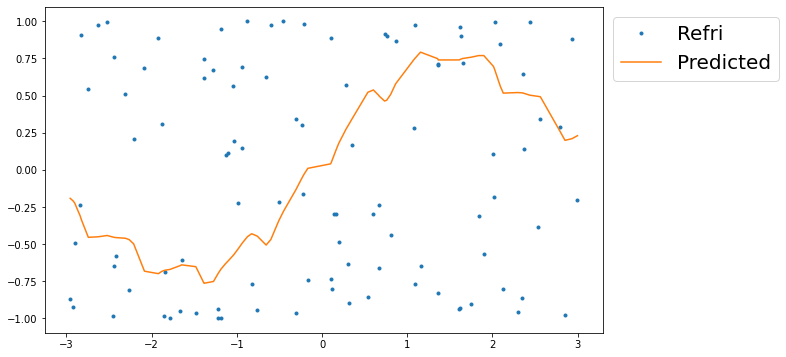

In [9]:
plt.figure(figsize=(10,6))
plt.plot(Xtest,ytest,'.', label = "Refri")
plt.plot(Xtest,y_mean.cpu(), label = "Predicted")
plt.legend(bbox_to_anchor=(1, 1),fontsize=20)
# sns.despine()
# plt.savefig("./Results/Refrigerator_building5.png", bbox_inches="tight")

In [10]:
model1 =  SGPRegressor(X.to("cuda"), y.to("cuda"), kernel1,
                       inducing_points).to("cuda")

In [11]:
pred_dist1 = model1.predict(Xtest.to("cuda"))
# print("Done ", i)

y_mean1 = pred_dist1.loc

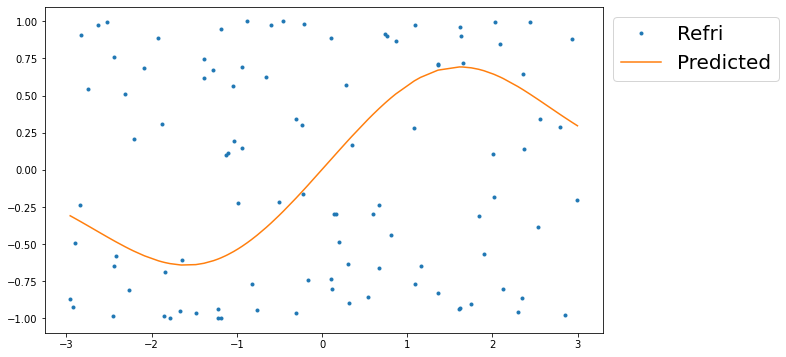

In [12]:
plt.figure(figsize=(10,6))
plt.plot(Xtest,ytest,'.', label = "Refri")
plt.plot(Xtest,y_mean1.cpu(), label = "Predicted")
plt.legend(bbox_to_anchor=(1, 1),fontsize=20)

In [13]:
model2 =  SGPRegressor(X.to("cuda"), y.to("cuda"), kernel2,
                       inducing_points).to("cuda")

In [14]:
pred_dist2 = model2.predict(Xtest.to("cuda"))
# print("Done ", i)

y_mean2 = pred_dist2.loc

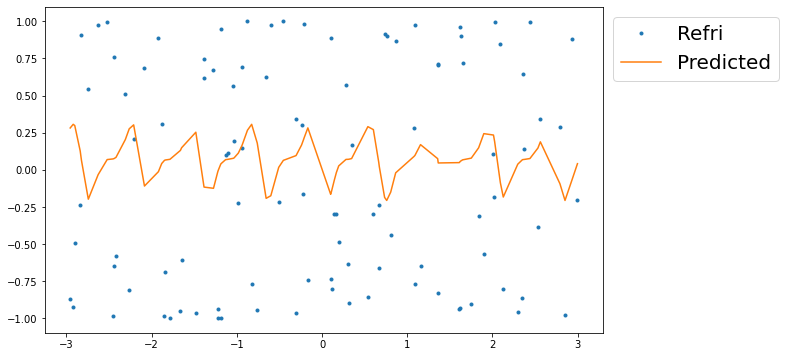

In [15]:
plt.figure(figsize=(10,6))
plt.plot(Xtest,ytest,'.', label = "Refri")
plt.plot(Xtest,y_mean2.cpu(), label = "Predicted")
plt.legend(bbox_to_anchor=(1, 1),fontsize=20)